In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


## 2.(a) 查看台灣島嶼輪廓 可視化比較logistic regression 跟random forest

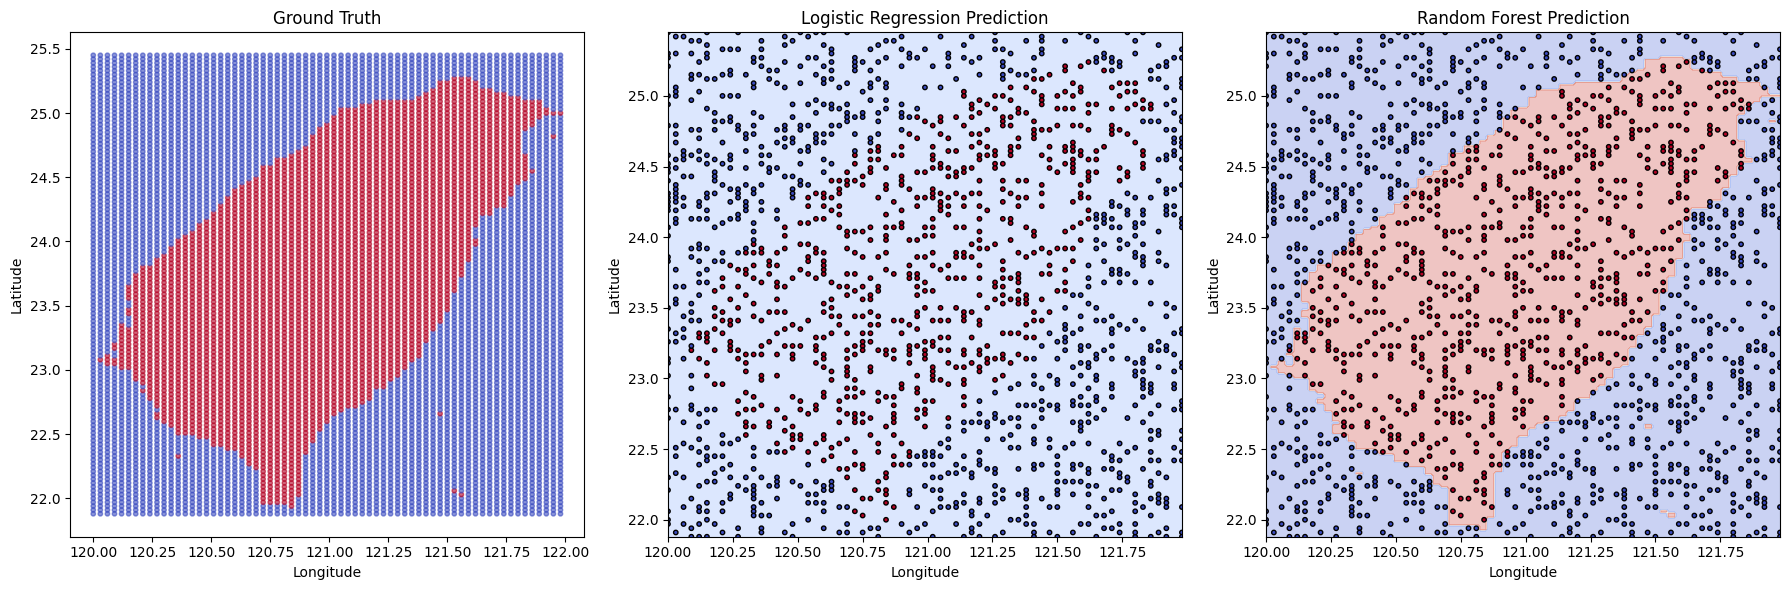

In [3]:
df_cls = pd.read_csv("classification_dataset.csv")
X = df_cls[["lon", "lat"]].values
y = df_cls["label"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Logistic model vs. random forest
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


lon_min, lon_max = X[:,0].min(), X[:,0].max()
lat_min, lat_max = X[:,1].min(), X[:,1].max()
xx, yy = np.meshgrid(
    np.linspace(lon_min, lon_max, 200),
    np.linspace(lat_min, lat_max, 200)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# --- Logistic model vs. random forest
Z_log = log_reg.predict(grid_points).reshape(xx.shape)
Z_rf = rf.predict(grid_points).reshape(xx.shape)

# --- 繪圖 ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1) 真實資料
axes[0].scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", s=10, alpha=0.6)
axes[0].set_title("Ground Truth")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# 2) Logistic Regression decision boundary
axes[1].contourf(xx, yy, Z_log, cmap="coolwarm", alpha=0.3)
axes[1].scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="coolwarm", s=10, edgecolor="k")
axes[1].set_title("Logistic Regression Prediction")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

# 3) Random Forest decision boundary
axes[2].contourf(xx, yy, Z_rf, cmap="coolwarm", alpha=0.3)
axes[2].scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="coolwarm", s=10, edgecolor="k")
axes[2].set_title("Random Forest Prediction")
axes[2].set_xlabel("Longitude")
axes[2].set_ylabel("Latitude")

plt.tight_layout()
plt.show()
